### Pipelines:

1. Idea of Composite Estimator:
    One ore more transformers/estimators are connected together. Composits estimators could be realised with the halp of pipelines in Sklearn.
    
    The pipeline makes our code reusable and modular

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [6]:
# first pass data through imputer then Scaler and finally train the ML model and get the output

In [7]:
pipelines = []
model_list = [LogisticRegression(max_iter=500), DecisionTreeClassifier(), RandomForestClassifier(), SVC(C=100), KNeighborsClassifier(n_neighbors=7)]
for model in model_list:
    pipeline= make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), model, verbose=True)
    pipelines.append(pipeline)

In [8]:
pipelines[1].steps[1]

('robustscaler', RobustScaler())

In [9]:
pipelines[1].steps[2]

('decisiontreeclassifier', DecisionTreeClassifier())

In [10]:
pipelines[3].steps[2]

('svc', SVC(C=100))

In [11]:
pipelines[1][2]  

DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target) # default 25 % test data

In [13]:
for pipeline in pipelines:
    pipeline.fit(x_train, y_train)  # first it will go to imputer then scaler and then fith the model

[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0

In [14]:
for pipeline in pipelines:
    print(pipeline.score(x_test, y_test))

0.965034965034965
0.9230769230769231
0.972027972027972
0.9370629370629371
0.958041958041958


In [15]:
from sklearn.metrics import recall_score

for pipeline in pipelines:
    print(recall_score(y_test, pipeline.predict(x_test), average='macro'))

0.9609862671660424
0.9236371202663338
0.9702455264253016
0.9312317935913441
0.9480857261756138


### Cross Validation:

The idea of only splitting data once for creating train test sets is flawed. Random presentation could easily give us high performance. So a better idea would be to use Cross Validation and report an averaged out metrics.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

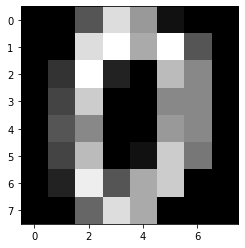

In [17]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap='gray')

In [18]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4)

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [19]:
dt.score(x_test, y_test)

0.8266666666666667

In [20]:
dt.score(x_train, y_train)

0.8789903489235338

In [21]:
# Cross validation:
# Split data into k-folds
# use random k-1 folds for training
# use remaining fold for testing
# run it for k times for a generalised behaviour

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(dt, digits.data, digits.target, cv=5)

In [22]:
scores

array([0.73888889, 0.65555556, 0.77715877, 0.77437326, 0.76880223])

In [23]:
scores.mean()

0.7429557412565769

In [24]:
scores.std()

0.045782705350179954

In [25]:
# Cross Validate: Get Scores for multiple metrics

from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro', 'accuracy']
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

{'fit_time': array([0.02098608, 0.01297188, 0.01297188, 0.01296043, 0.01396251]),
 'score_time': array([0.00199032, 0.00199175, 0.0019896 , 0.00198674, 0.00195789]),
 'test_precision_macro': array([0.76288013, 0.71585417, 0.78223394, 0.80642389, 0.77562027]),
 'test_recall_macro': array([0.75564994, 0.68094595, 0.77035544, 0.78397469, 0.76279065]),
 'test_accuracy': array([0.75555556, 0.68055556, 0.77158774, 0.78551532, 0.76044568])}

### Hyperparameter Tuning

Hyperparameters: parameters which are user provided and control the algorithm itself
THese are dependent on data and require multiple experiments(hit an trial) to acheive the best values

Sklearn provides Grid Search to implement exhaustive search for hyperparameters

In [26]:
dt = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

In [27]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5), 'min_samples_split':[2,3,4,5]}, cv=5, n_jobs=-1, scoring='recall_macro',verbose=3)


In [28]:
grid_search.fit(digits.data, digits.target)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 30, 5),
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='recall_macro', verbose=3)

In [29]:
model = grid_search.best_estimator_
model

DecisionTreeClassifier(max_depth=20, min_samples_split=4)

In [30]:
grid_search.cv_results_

{'mean_fit_time': array([0.01835179, 0.0249332 , 0.0249321 , 0.01934481, 0.03311095,
        0.02772584, 0.02892294, 0.03291125, 0.0325139 , 0.03251233,
        0.03330903, 0.02912259, 0.0323102 , 0.02971792, 0.03331695,
        0.0297194 , 0.03311009, 0.03191981, 0.03273926, 0.02752943]),
 'std_fit_time': array([0.00149385, 0.00504623, 0.00403792, 0.00162605, 0.0091925 ,
        0.00159602, 0.00362223, 0.01158122, 0.00161793, 0.00430376,
        0.00119582, 0.00203534, 0.00544995, 0.00342028, 0.00525249,
        0.00255386, 0.00443333, 0.00405174, 0.00518929, 0.0029546 ]),
 'mean_score_time': array([0.00718012, 0.00638385, 0.00259323, 0.00279994, 0.00239449,
        0.00259352, 0.00279255, 0.00239291, 0.00239263, 0.00279288,
        0.00179482, 0.00319171, 0.00339093, 0.00218983, 0.00218706,
        0.00259981, 0.00239387, 0.00269518, 0.0026721 , 0.00179563]),
 'std_score_time': array([0.0021318 , 0.00293296, 0.00048809, 0.00075687, 0.00079689,
        0.00079984, 0.00074685, 0.000490

In [31]:
grid_search.best_score_

0.7929827138062431

In [32]:
model

DecisionTreeClassifier(max_depth=20, min_samples_split=4)

In [33]:
model.score(digits.data, digits.target)

0.9860879243183083

In [34]:
pred = model.predict(digits.data)
pred

array([0, 1, 2, ..., 8, 9, 8])

## Assignment - wine data

In [35]:
from sklearn.datasets import load_wine
wine = load_wine()

In [36]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [37]:
wine_df = pd.DataFrame(wine.data)
wine_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### Hyperparameter Tuning

In [38]:
'''
# LOG
grid_search_log = GridSearchCV(log_clf, param_grid={'max_iter':range(500,20000,500), 'solver':['newton-cg', 'lbfgs', 'saga']}, cv=5, n_jobs=-1,verbose=3)
grid_search_log.fit(wine.data, wine.target)
log_model = grid_search_log.best_estimator_
print(log_model)
'''


"\n# LOG\ngrid_search_log = GridSearchCV(log_clf, param_grid={'max_iter':range(500,20000,500), 'solver':['newton-cg', 'lbfgs', 'saga']}, cv=5, n_jobs=-1,verbose=3)\ngrid_search_log.fit(wine.data, wine.target)\nlog_model = grid_search_log.best_estimator_\nprint(log_model)\n"

In [39]:
'''# RF
grid_search_rf = GridSearchCV(rf, param_grid={'max_depth':range(5,30,5), 'min_samples_split':[2,3,4,5]}, cv=5, n_jobs=-1, verbose=3)
grid_search_rf.fit(wine.data, wine.target)
rf_model = grid_search_rf.best_estimator_
print(rf_model)'''

"# RF\ngrid_search_rf = GridSearchCV(rf, param_grid={'max_depth':range(5,30,5), 'min_samples_split':[2,3,4,5]}, cv=5, n_jobs=-1, verbose=3)\ngrid_search_rf.fit(wine.data, wine.target)\nrf_model = grid_search_rf.best_estimator_\nprint(rf_model)"

In [40]:
'''# SVC
grid_search_svc = GridSearchCV(svc, param_grid={'C':range(1,50,1), 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}, cv=5, n_jobs=-1,verbose=3)
grid_search_svc.fit(wine.data, wine.target)
svc_model = grid_search_svc.best_estimator_
print(svc_model)'''

"# SVC\ngrid_search_svc = GridSearchCV(svc, param_grid={'C':range(1,50,1), 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}, cv=5, n_jobs=-1,verbose=3)\ngrid_search_svc.fit(wine.data, wine.target)\nsvc_model = grid_search_svc.best_estimator_\nprint(svc_model)"

In [41]:
'''# KNN
grid_search_knn = GridSearchCV(knn, param_grid={'n_neighbors':range(2,15,1)}, cv=5, n_jobs=-1,verbose=3)
grid_search_knn.fit(wine.data, wine.target)
knn_model = grid_search_knn.best_estimator_
print(knn_model)'''

"# KNN\ngrid_search_knn = GridSearchCV(knn, param_grid={'n_neighbors':range(2,15,1)}, cv=5, n_jobs=-1,verbose=3)\ngrid_search_knn.fit(wine.data, wine.target)\nknn_model = grid_search_knn.best_estimator_\nprint(knn_model)"

### Make Pipelines


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def get_reports(y_test, y_pred):
    print("\nAccuracy:",accuracy_score(y_test, y_pred))
    print("Precision Score:",precision_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("Recall Score:",recall_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("f1 Score:",f1_score(y_test, y_pred, average = 'macro', zero_division=0))
    
    print("\n \nClassification Report:\n\n",classification_report(y_test, y_pred, zero_division=0))
    print("\n \nConfusion Matrix:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n\n")

In [43]:
logclf = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [44]:
# Train test split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2) 

In [45]:
pipelines = []
model_list = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

for model in model_list:
    pipeline= make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), model, verbose=True) 
    pipelines.append(pipeline)

In [46]:
param_list = [{'logisticregression__max_iter':list(range(500,20000,500)), 'logisticregression__solver':['newton-cg', 'lbfgs', 'saga']},
              {'randomforestclassifier__max_depth':[10,50,100,200,250], 'randomforestclassifier__max_depth':list(range(5,30,5)), 'randomforestclassifier__min_samples_split':[2,3,4,5]},
              {'svc__C':list(range(1,50,1)), 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid']},
              {'kneighborsclassifier__n_neighbors':list(range(2,15,1))}]

scoring = ['precision_macro', 'recall_macro', 'accuracy']

for pipeline, x in zip(pipelines, param_list):
    
    grid_search = GridSearchCV(pipeline, x, cv=5, n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)
    model = grid_search.best_estimator_
    print("\n\nModel:",model)
    
    y_pred = model.predict(x_test)
    print("\n Test score:",model.score(x_test, y_test))
    print("\n Train score:",model.score(x_train, y_train),"\n")
    get_reports(y_test, y_pred)
    
    print("\nCross Validate:\n")
    cv = cross_validate(model, wine.data, wine.target, scoring=scoring, cv=5)
    print("\n",pipeline.steps[2],"\n")
    print("Mean Accuracy:",cv['test_accuracy'].mean())
    print("Mean Precision:",cv['test_precision_macro'].mean())
    print("Mean Recall:",cv['test_recall_macro'].mean())
    print("\n\n")

Fitting 5 folds for each of 117 candidates, totalling 585 fits
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.0s


Model: Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, solver='newton-cg'))],
         verbose=True)

 Test score: 0.9722222222222222

 Train score: 1.0 


Accuracy: 0.9722222222222222
Precision Score: 0.9761904761904763
Recall Score: 0.9696969696969697
f1 Score: 0.9717813051146384

 
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.91      0.95        11

    accuracy                     

In [47]:
# Weekly Assignment 

# Red Wine.csv

# EDA
# Utilise Pipelines, CV and Grid Search to optimize and get best results for classification.
# Try with all known Classification Techniques

## Randomized Search

* Unlike grid search not all parameters are tried and tested.
* Rther a fixed number of parameter settings is sampled from the distribution

In [48]:
from time import time

# randint is an iterator for generating numbers between range specified

from scipy.stats import randint

In [49]:
X = digits.data
Y = digits.target

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# specift parameters and distributions to sample from

param_dist = {"max_depth":randint(5,30),
              "max_features":[0.4, 0.6, 0.75],
              "min_samples_split":randint(2,11),
              "criterion":["gini", "entropy"]}

In [57]:
rf = RandomForestClassifier(n_estimators=200)

In [58]:
n_iter = 50
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter, cv =5, n_jobs= -1, verbose=1)

start = time()
random_search.fit(X,Y)

print("Randomized Search CV took %.2f secs for %d candidates parameter settings" %((time()-start), n_iter))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Randomized Search CV took 103.57 secs for 50 candidates parameter settings


In [59]:
random_search.best_score_

0.933237387805633

In [60]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'max_features': 0.4,
 'min_samples_split': 2}

In [62]:
param_grid = {"max_depth":[3,5,9,13,15],
              "max_features":[0.4,0.5,0.75],
              "min_samples_split":[2,3,5,7],
              "criterion":["gini", "entropy"]}

# Run Grid Search

grid_search = GridSearchCV(rf, param_grid=param_grid, cv =5, n_jobs= -1, verbose=1)

start = time()
grid_search.fit(X,Y)

print("Grid Search CV took %.2f secs for %d candidates parameter settings" %((time()-start), len(grid_search.cv_results_['params'])))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Grid Search CV took 223.46 secs for 120 candidates parameter settings


In [63]:
grid_search.best_score_

0.9354596100278553

In [64]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 0.4,
 'min_samples_split': 3}

In [65]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=0.4,
                       min_samples_split=3, n_estimators=200)

## Model Persistance

* Model training is an expensive process
* Thus is it desirable to save it as a file on Hard disk
* Using pickle or joblib we could easily save the model as a file

In [66]:
import pickle
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [67]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [69]:
from sklearn.svm import SVC

svc_clf = SVC()

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [71]:
model = make_pipeline(robust_scaler, svc_clf)

param_grid = {'svc__C': [1,5,10,50,100],
              'svc__kernel':['poly', 'rbf', 'linear'],
              'svc__degree':[3,4,5,6,7,10],
              'svc__gamma':[0.1,0.5,1.5,10]}

grid_search = GridSearchCV(model, param_grid=param_grid, cv =5, n_jobs= -1, verbose=1)
grid_search.fit(cancer_data.data, cancer_data.target)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 5, 10, 50, 100],
                         'svc__degree': [3, 4, 5, 6, 7, 10],
                         'svc__gamma': [0.1, 0.5, 1.5, 10],
                         'svc__kernel': ['poly', 'rbf', 'linear']},
             verbose=1)

In [72]:
grid_search.best_estimator_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc', SVC(C=1, gamma=0.1, kernel='linear'))])

In [73]:
grid_search.best_params_

{'svc__C': 1, 'svc__degree': 3, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}

In [74]:
grid_search.cv_results_

{'mean_fit_time': array([0.02396121, 0.03074007, 0.02319851, 0.02143512, 0.04119868,
        0.01894813, 0.01730409, 0.04120803, 0.01613426, 0.02965536,
        0.04451365, 0.01519756, 0.01944165, 0.02212505, 0.01600327,
        0.02337232, 0.03447499, 0.01424413, 0.0205194 , 0.03845339,
        0.01425533, 0.02059283, 0.04069524, 0.01344609, 0.01365833,
        0.01783566, 0.01655893, 0.02163177, 0.04527459, 0.01835384,
        0.01675839, 0.03796368, 0.01454825, 0.01997433, 0.05174479,
        0.01522322, 0.02672477, 0.02395401, 0.01406412, 0.03237157,
        0.04102745, 0.0158216 , 0.0260221 , 0.0366827 , 0.01296306,
        0.02299037, 0.04410963, 0.01288724, 0.01491952, 0.02048764,
        0.01324921, 0.0154438 , 0.03717213, 0.01335974, 0.02116899,
        0.03771181, 0.01420484, 0.01741891, 0.04334211, 0.01330972,
        0.0224895 , 0.01845789, 0.01358042, 0.03542504, 0.03331318,
        0.01336465, 0.0331706 , 0.04096565, 0.01666036, 0.03116374,
        0.04244533, 0.01558046,

In [75]:
best_clf = grid_search.best_estimator_

In [76]:
type(best_clf)

sklearn.pipeline.Pipeline

In [77]:
with open('svc_model.pickle', 'wb') as handle:
    pickle.dump(best_clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [78]:
# we could simply load a previously saved/created model as start predictions

with open('svc_model.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [79]:
b

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc', SVC(C=1, gamma=0.1, kernel='linear'))])

In [80]:
b.score(cancer_data.data, cancer_data.target)

0.9876977152899824

In [81]:
pred= b.predict(cancer_data.data)

In [85]:
get_reports(cancer_data.target, pred)


Accuracy: 0.9876977152899824
Precision Score: 0.9882708665603402
Recall Score: 0.985406426721632
f1 Score: 0.9868050103194559

 
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569


 
Confusion Matrix:

[[207   5]
 [  2 355]]





## Validation Curve

1. To validate a model against one parameter change we will a scoring function
2. Create a grid of possible hyperparameters configurations
3. Select the hyperparamneters which gives the best score

In [87]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = np.arange(5,150,5)

train_score, test_score = validation_curve(RandomForestClassifier(),
                                          digits.data,
                                          digits.target,
                                          param_name='n_estimators',
                                          param_range=param_range, 
                                          cv=5,
                                          scoring='recall_macro',
                                          n_jobs=-1)



In [89]:
print(test_score)

[[0.83014157 0.81416774 0.85760492 0.87933934 0.85517375]
 [0.9109438  0.86131489 0.93797499 0.92657872 0.89524024]
 [0.90817031 0.85266838 0.94653784 0.94649936 0.872855  ]
 [0.91087302 0.88902188 0.94973503 0.95190047 0.92249678]
 [0.91055556 0.89410982 0.9471074  0.95761476 0.92781424]
 [0.94150794 0.86933934 0.95226108 0.95753539 0.93083012]
 [0.92768983 0.89757615 0.96083289 0.958003   0.91669884]
 [0.93324968 0.89735521 0.94099553 0.96031317 0.91700343]
 [0.93587302 0.91689189 0.95520226 0.96626126 0.92264264]
 [0.9247619  0.90832046 0.96068274 0.96626126 0.90905405]
 [0.9302381  0.9195903  0.95781664 0.95499142 0.92557486]
 [0.93324968 0.9060725  0.96068274 0.96332475 0.9281982 ]
 [0.92761476 0.9003668  0.95249956 0.96649507 0.93090519]
 [0.92468254 0.90855427 0.95488871 0.96634063 0.9309009 ]
 [0.93031746 0.91425568 0.95774157 0.96649507 0.928432  ]
 [0.93587302 0.91433934 0.95503886 0.96317031 0.91986057]
 [0.93873016 0.9141849  0.96369899 0.96610682 0.93638567]
 [0.93039683 0

In [90]:
print(train_score)

[[0.99514254 0.99507922 0.99573413 0.99296016 0.9972318 ]
 [1.         1.         0.99928571 0.99856115 0.99931507]
 [0.99931507 1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1

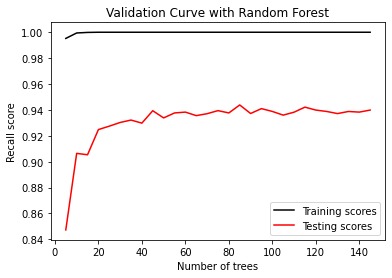

In [88]:
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

train_std = np.std(train_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.plot(param_range, train_mean, label = "Training scores", color ='black')
plt.plot(param_range, test_mean, label = "Testing scores", color ='red')

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("Recall score")

plt.legend()
plt.show()